## Data Import 

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tools as tool
from tools import utils as util
from sklearn import preprocessing
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [362]:
data = pd.read_csv('House_Price.csv')

In [363]:
data.shape

(1460, 81)

In [364]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [365]:
#selecting all columns that do not have numeric values
object_column = data.select_dtypes(include = ['object']).columns.tolist()

## Feature Processing (One Hot Encoding)

In [368]:
for column in object_column:
    data = util.one_hot_encoding(data, column)
ohc_data = data

KeyError: "None of [Index(['MSZoning'], dtype='object')] are in the [columns]"

<AxesSubplot:>

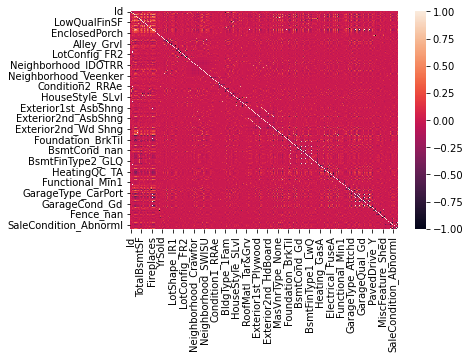

In [367]:
sns.heatmap(ohc_data.corr())

In [307]:
threshold = 0.7

df_corr = ohc_data.corr()

columns = np.full((df_corr.shape[0],), True, dtype=bool)

for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False


selected_columns = ohc_data.columns[~columns]
high_correlation = ohc_data[selected_columns]

In [308]:
absolute_corr = np.abs(df_corr["SalePrice"])
df_corr["SalePrice"][absolute_corr > 0.5]

OverallQual       0.790982
YearBuilt         0.522897
YearRemodAdd      0.507101
TotalBsmtSF       0.613581
1stFlrSF          0.605852
GrLivArea         0.708624
FullBath          0.560664
TotRmsAbvGrd      0.533723
GarageCars        0.640409
GarageArea        0.623431
SalePrice         1.000000
ExterQual_TA     -0.589044
BsmtQual_Ex       0.553105
KitchenQual_Ex    0.504094
KitchenQual_TA   -0.519298
Name: SalePrice, dtype: float64

In [309]:
selected_columns

Index(['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice',
       'Neighborhood_Somerst', 'HouseStyle_2Story', 'RoofStyle_Shed',
       'RoofMatl_Tar&Grv', 'Exterior2nd_AsbShng', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'BsmtQual_nan', 'BsmtCond_nan',
       'BsmtExposure_nan', 'BsmtFinType1_nan', 'BsmtFinType2_nan',
       'Electrical_Mix', 'GarageFinish_nan', 'GarageQual_nan', 'GarageCond_Ex',
       'GarageCond_TA', 'GarageCond_nan', 'MiscFeature_Gar2',
       'MiscFeature_TenC', 'SaleCondition_Partial'],
      dtype='object')

In [310]:
high_correlation.corr().head()

,1stFlrSF,TotRmsAbvGrd,GarageYrBlt,GarageArea,SalePrice,Neighborhood_Somerst,HouseStyle_2Story,RoofStyle_Shed,RoofMatl_Tar&Grv,Exterior2nd_AsbShng,...,BsmtFinType2_nan,Electrical_Mix,GarageFinish_nan,GarageQual_nan,GarageCond_Ex,GarageCond_TA,GarageCond_nan,MiscFeature_Gar2,MiscFeature_TenC,SaleCondition_Partial
1stFlrSF,1.000000,0.409516,0.233449,0.489782,0.605852,-0.018495,-0.269813,0.017622,0.071021,-0.063332,...,-0.018376,-0.005801,-0.154846,-0.154846,-0.032741,0.186819,-0.154846,-0.000300,0.015539,0.221037
TotRmsAbvGrd,0.409516,1.000000,0.148112,0.337822,0.533723,-0.015275,0.430930,0.033786,-0.013142,0.002335,...,-0.012382,-0.008343,-0.088285,-0.088285,-0.045995,0.072106,-0.088285,0.045183,0.088332,0.142032
GarageYrBlt,0.233449,0.148112,1.000000,0.564567,0.486362,0.277452,0.186831,-0.000782,-0.050926,-0.136388,...,-0.070103,-0.063858,NaN,NaN,0.013116,0.275846,NaN,-0.015451,-0.000552,0.349327
GarageArea,0.489782,0.337822,0.564567,1.000000,0.623431,0.184533,0.137946,0.020798,-0.006663,-0.092541,...,-0.075543,-0.016534,-0.536333,-0.536333,0.024090,0.485444,-0.536333,-0.003896,0.011149,0.294714
SalePrice,0.605852,0.533723,0.486362,0.623431,1.000000,0.140058,0.242880,0.020557,0.004921,-0.099220,...,-0.145274,-0.037555,-0.236832,-0.236832,-0.026546,0.275872,-0.236832,-0.004744,0.022773,0.352060


## Feature Processing (Label Encoding)

In [371]:
data = pd.read_csv('House_Price.csv')

In [372]:
for column in object_column:
    data = util.label_encoder(data, column)
lc_data = data

<AxesSubplot:>

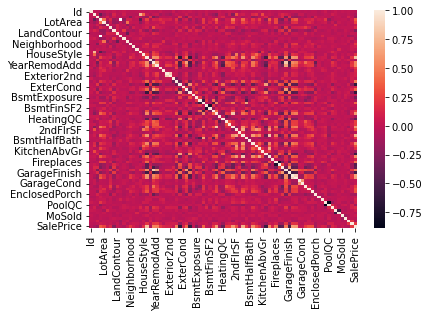

In [314]:
sns.heatmap(lc_data.corr())

In [315]:
threshold = 0.7

df_corr = lc_data.corr()

columns = np.full((df_corr.shape[0],), True, dtype=bool)

for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False


selected_columns = lc_data.columns[~columns]
high_correlation = lc_data[selected_columns]

In [316]:
absolute_corr = np.abs(df_corr["SalePrice"])
df_corr["SalePrice"][absolute_corr > 0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
ExterQual      -0.636884
BsmtQual       -0.620886
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual    -0.589189
TotRmsAbvGrd    0.533723
GarageFinish   -0.549247
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [317]:
selected_columns

Index(['BldgType', 'Exterior2nd', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [318]:
high_correlation.corr()

,BldgType,Exterior2nd,1stFlrSF,TotRmsAbvGrd,GarageYrBlt,GarageArea,SalePrice
BldgType,1.000000,-0.142748,-0.073688,-0.198413,0.200367,-0.061421,-0.085591
Exterior2nd,-0.142748,1.000000,0.017361,0.068503,0.155058,0.095006,0.103766
1stFlrSF,-0.073688,0.017361,1.000000,0.409516,0.233449,0.489782,0.605852
TotRmsAbvGrd,-0.198413,0.068503,0.409516,1.000000,0.148112,0.337822,0.533723
GarageYrBlt,0.200367,0.155058,0.233449,0.148112,1.000000,0.564567,0.486362
GarageArea,-0.061421,0.095006,0.489782,0.337822,0.564567,1.000000,0.623431
SalePrice,-0.085591,0.103766,0.605852,0.533723,0.486362,0.623431,1.000000


## Feature Processing (One Hot and Label Encoding)

In [319]:
data = pd.read_csv('House_Price.csv')

In [320]:
#selecting which columns to use label encoding on
#columns that compare the quality should be used or show that one category is better than
#another category should be used here
lccolumn = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

In [321]:
#selecting which columns to use one hot encoding on
#ex: Streets should use the one hot encoder because the type of road 
#access should be based on whether it exists or not. 
ohccolumn = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
             'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation','Heating','Electrical','GarageType','MiscFeature','SaleType','SaleCondition']

In [322]:
for column in ohccolumn:
    data = util.one_hot_encoding(data, column)

In [323]:
for column in lccolumn:
    data = util.label_encoder(data, column)

In [324]:
combined_data = data

<AxesSubplot:>

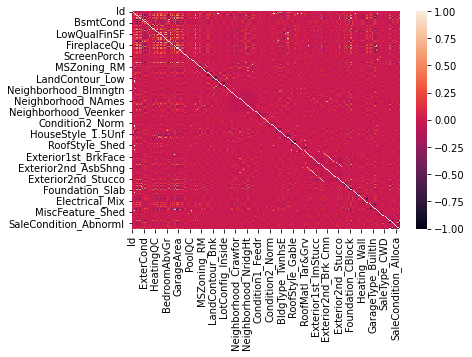

In [325]:
sns.heatmap(combined_data.corr())

In [326]:
threshold = 0.7

df_corr = combined_data.corr()

columns = np.full((df_corr.shape[0],), True, dtype=bool)

for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False


selected_columns = combined_data.columns[~columns]
high_correlation = combined_data[selected_columns]

In [327]:
absolute_corr = np.abs(df_corr["SalePrice"])
df_corr["SalePrice"][absolute_corr > 0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
ExterQual      -0.636884
BsmtQual       -0.620886
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual    -0.589189
TotRmsAbvGrd    0.533723
GarageFinish   -0.549247
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [328]:
selected_columns

Index(['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice',
       'Neighborhood_Somerst', 'HouseStyle_2Story', 'RoofStyle_Shed',
       'RoofMatl_Tar&Grv', 'Exterior2nd_AsbShng', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'MiscFeature_Gar2', 'SaleCondition_Partial'],
      dtype='object')

In [329]:
high_correlation.corr().head()

,1stFlrSF,TotRmsAbvGrd,GarageYrBlt,GarageArea,SalePrice,Neighborhood_Somerst,HouseStyle_2Story,RoofStyle_Shed,RoofMatl_Tar&Grv,Exterior2nd_AsbShng,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MiscFeature_Gar2,SaleCondition_Partial
1stFlrSF,1.000000,0.409516,0.233449,0.489782,0.605852,-0.018495,-0.269813,0.017622,0.071021,-0.063332,-0.021856,0.080482,-0.039553,-0.144566,0.110230,0.014831,0.071504,-0.057258,-0.000300,0.221037
TotRmsAbvGrd,0.409516,1.000000,0.148112,0.337822,0.533723,-0.015275,0.430930,0.033786,-0.013142,0.002335,-0.008343,0.048695,-0.035270,-0.113001,-0.029205,0.049522,0.127698,-0.046896,0.045183,0.142032
GarageYrBlt,0.233449,0.148112,1.000000,0.564567,0.486362,0.277452,0.186831,-0.000782,-0.050926,-0.136388,-0.012559,0.113738,-0.047607,-0.198319,-0.055669,-0.136639,0.533014,-0.325996,-0.015451,0.349327
GarageArea,0.489782,0.337822,0.564567,1.000000,0.623431,0.184533,0.137946,0.020798,-0.006663,-0.092541,-0.016534,0.046189,-0.033155,-0.115115,-0.002738,0.001273,0.280274,-0.176492,-0.003896,0.294714
SalePrice,0.605852,0.533723,0.486362,0.623431,1.000000,0.140058,0.242880,0.020557,0.004921,-0.099220,-0.025028,0.128183,-0.067864,-0.162389,-0.052941,-0.042416,0.306389,-0.161800,-0.004744,0.352060


## Log Sale Price

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

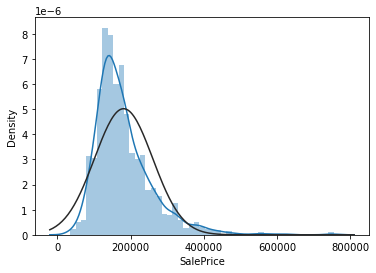

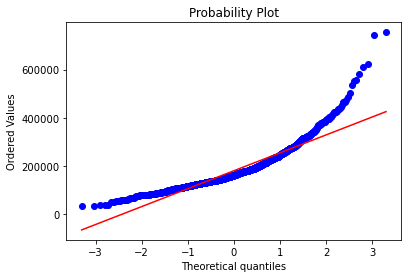

In [374]:
util.dist_and_prob_plot(data, 'SalePrice')

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

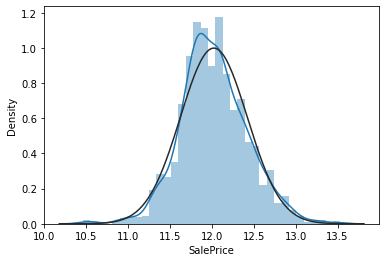

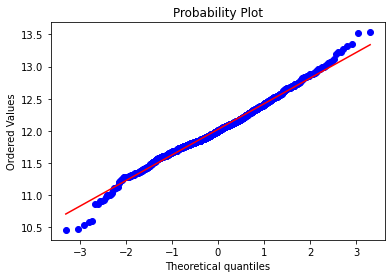

In [375]:
data['SalePrice'] = np.log(data['SalePrice'])
util.dist_and_prob_plot(data, 'SalePrice')

In [342]:
ohc_data['SalePrice'] = np.log(ohc_data['SalePrice'])
lc_data['SalePrice'] = np.log(lc_data['SalePrice'])
combined_data['SalePrice'] = np.log(combined_data['SalePrice'])

## Random Forest Model (One Hot Encoding)

In [343]:
ohc_data = ohc_data.dropna()
X = ohc_data.drop(['SalePrice', 'Id'], axis = 'columns')
y = ohc_data['SalePrice']

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [347]:
#made a dataframe with values greater than .001 importance
#sorted the values to look better on bargraph
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
a = dataframe[dataframe[0] > .001]
a = a.rename(columns = {0: 'values'})
b = a.sort_values('values', ascending = True)
b.head()

,values
BsmtQual_TA,0.001014
ExterQual_Ex,0.001019
KitchenQual_Ex,0.001034
GarageType_Attchd,0.001091
KitchenQual_Gd,0.001097


<BarContainer object of 45 artists>

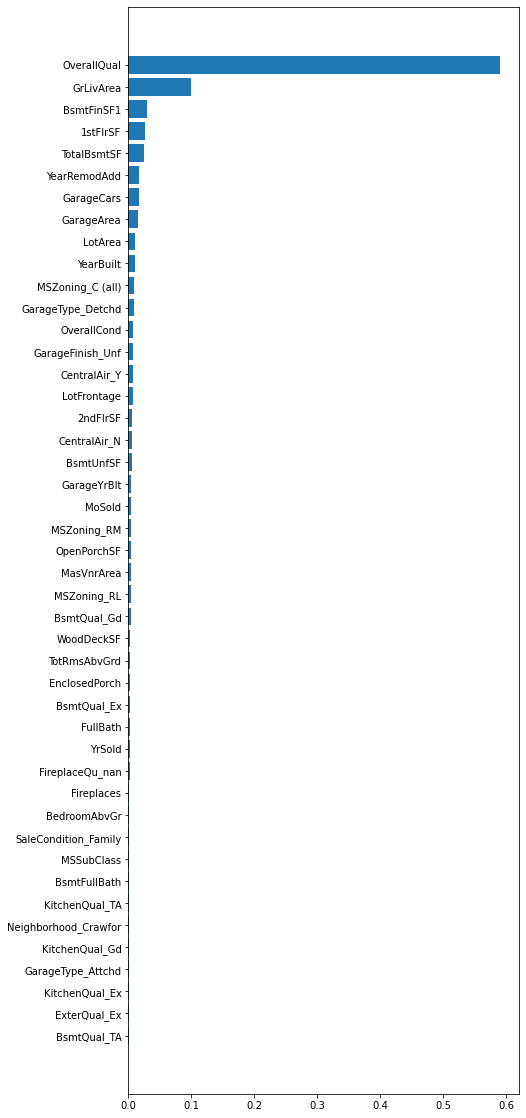

In [348]:
plt.figure(figsize=(7, 20))
plt.barh(b.index, b['values'])

In [349]:
#made another dataframe with a smaller importance threshold
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
c = dataframe[dataframe[0] > .01]
c = c.rename(columns = {0: 'values'})
d = c.sort_values('values', ascending = True)
d

,values
LotArea,0.010950
GarageArea,0.015226
GarageCars,0.016606
YearRemodAdd,0.016819
TotalBsmtSF,0.024136
1stFlrSF,0.026207
BsmtFinSF1,0.028874
GrLivArea,0.098913
OverallQual,0.591156


<BarContainer object of 9 artists>

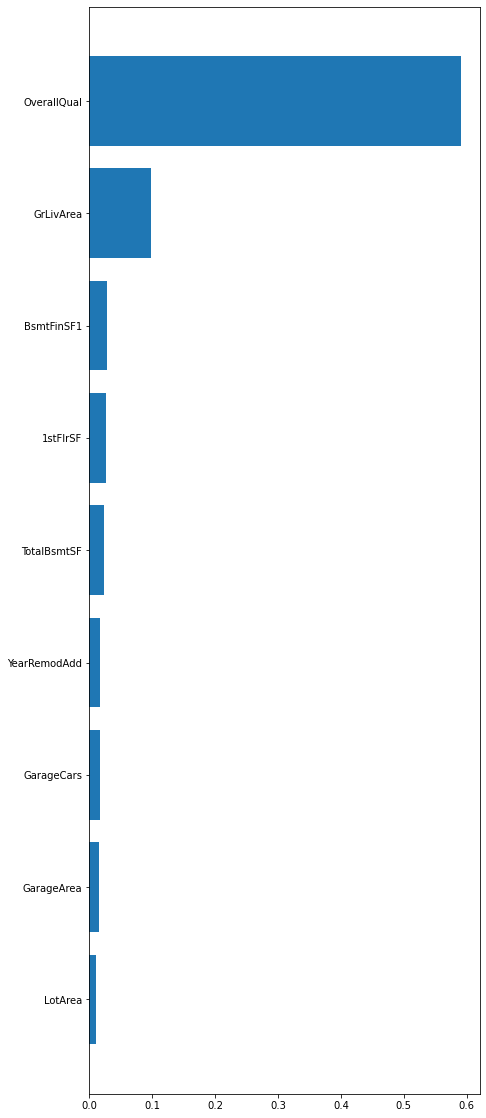

In [350]:
plt.figure(figsize=(7, 20))
plt.barh(d.index, d['values'])

In [351]:
y_output = rf.predict(X_test)

In [352]:
print('MSE', mean_squared_error(y_test, y_output))
print('RMSE', math.sqrt(mean_squared_error(y_test, y_output)))
print('Adj R^2 value:', r2_score(y_test, y_output))

MSE 0.023397237595640556
RMSE 0.15296155594017916
Adj R^2 value: 0.8655196046473326


## Random Forest Model (Label Encoding)

In [353]:
lc_data = lc_data.dropna()
X = lc_data.drop(['SalePrice', 'Id'], axis = 'columns')
y = lc_data['SalePrice']

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [355]:
#made a dataframe with values greater than .001 importance
#sorted the values to look better on bargraph
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
a = dataframe[dataframe[0] > .001]
a = a.rename(columns = {0: 'values'})
b = a.sort_values('values', ascending = True)
b.head()

,values
HeatingQC,0.001142
MSSubClass,0.001211
PavedDrive,0.001222
LotShape,0.001228
ExterCond,0.001251


<BarContainer object of 45 artists>

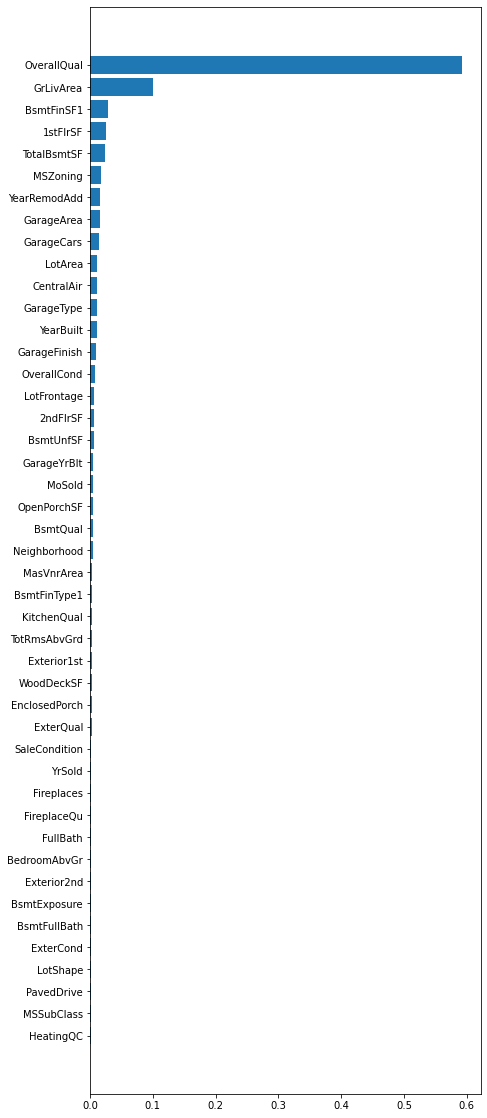

In [356]:
plt.figure(figsize=(7, 20))
plt.barh(b.index, b['values'])

In [357]:
#made another dataframe with a smaller importance threshold
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
c = dataframe[dataframe[0] > .01]
c = c.rename(columns = {0: 'values'})
d = c.sort_values('values', ascending = True)
d

,values
YearBuilt,0.010549
GarageType,0.010711
CentralAir,0.011251
LotArea,0.011378
GarageCars,0.014471
GarageArea,0.015810
YearRemodAdd,0.016053
MSZoning,0.017019
TotalBsmtSF,0.024379
1stFlrSF,0.026215


<BarContainer object of 13 artists>

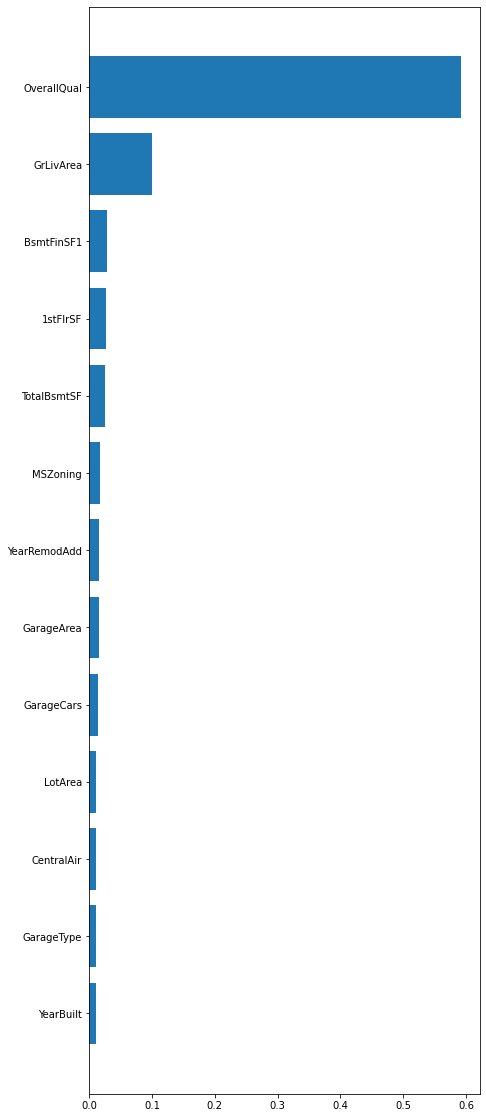

In [358]:
plt.figure(figsize=(7, 20))
plt.barh(d.index, d['values'])

In [359]:
y_output = rf.predict(X_test)

In [360]:
print('MSE', mean_squared_error(y_test, y_output))
print('RMSE', math.sqrt(mean_squared_error(y_test, y_output)))
print('Adj R^2 value:', r2_score(y_test, y_output))

MSE 0.023065930773842478
RMSE 0.15187472065436855
Adj R^2 value: 0.8674238581813798


## Random Forest Model(One Hot and Label Encoding)

In [291]:
combined_data = combined_data.dropna()
X = combined_data.drop(['SalePrice', 'Id'], axis = 'columns')
y = combined_data['SalePrice']

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [293]:
#made a dataframe with values greater than .001 importance
#sorted the values to look better on bargraph
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
a = dataframe[dataframe[0] > .001]
a = a.rename(columns = {0: 'values'})
b = a.sort_values('values', ascending = True)
b.head()

,values
Neighborhood_6,0.001083
GarageType_1,0.001140
PavedDrive,0.001210
ExterCond,0.001253
HeatingQC,0.001290


<BarContainer object of 45 artists>

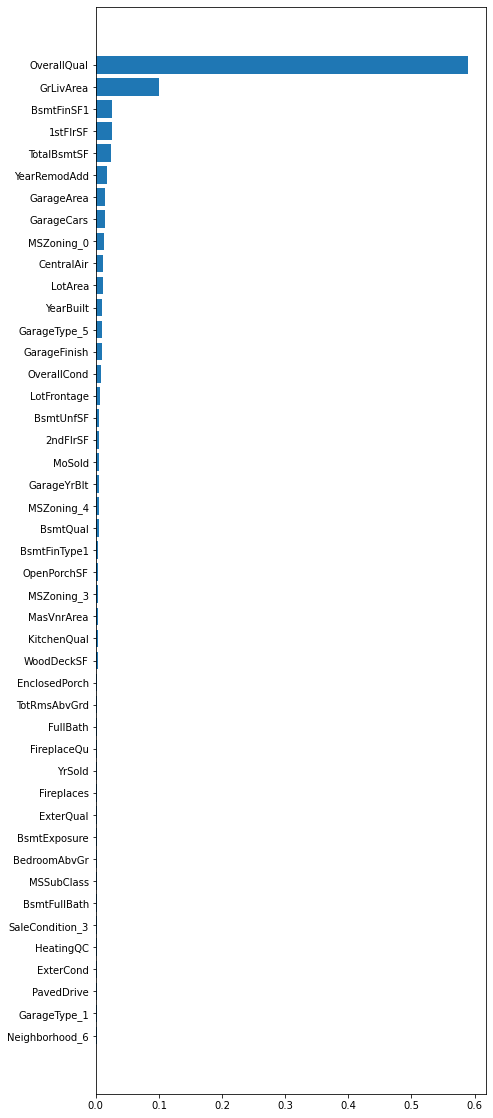

In [294]:
plt.figure(figsize=(7, 20))
plt.barh(b.index, b['values'])

In [295]:
#made another dataframe with a smaller importance threshold
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
c = dataframe[dataframe[0] > .01]
c = c.rename(columns = {0: 'values'})
d = c.sort_values('values', ascending = True)
d

,values
LotArea,0.011152
CentralAir,0.011860
MSZoning_0,0.013596
GarageCars,0.014533
GarageArea,0.014900
YearRemodAdd,0.017539
TotalBsmtSF,0.023884
1stFlrSF,0.025663
BsmtFinSF1,0.026292
GrLivArea,0.099646


<BarContainer object of 11 artists>

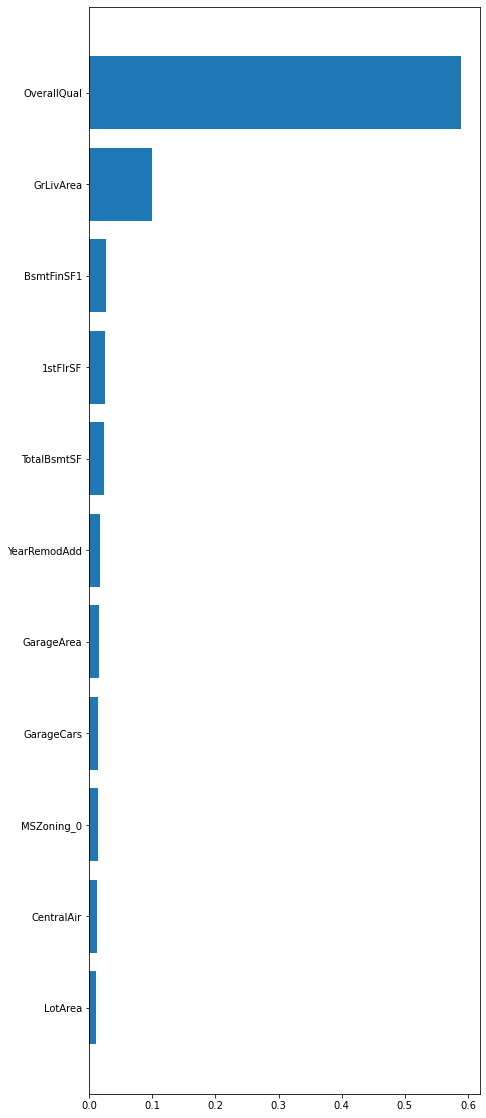

In [296]:
plt.figure(figsize=(7, 20))
plt.barh(d.index, d['values'])

In [297]:
y_output = rf.predict(X_test)

In [298]:
print('MSE', mean_squared_error(y_test, y_output))
print('RMSE', math.sqrt(mean_squared_error(y_test, y_output)))
print('Adj R^2 value:', r2_score(y_test, y_output))

MSE 0.00016092846014439623
RMSE 0.012685758161986072
Adj R^2 value: 0.8633969814498347


## Author Contributions:

Isaac: 

Brandon:

Raj: 